<a href="https://colab.research.google.com/github/AmyMorrison2/asthma-air-pollution-capstone/blob/main/Asthma_Capstone_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methodology


In [ ]:
import pandas as pd

asthma_df = pd.read_csv("crude_asthma_2011_2021.csv", dtype={"CountyFIPS": str, "StateFIPS": str})
pollution_df = pd.read_csv("cleaned_data_2011_2021.csv", dtype={"FIPS": str, "State Code": str, "County Code": str})


In [ ]:
asthma_df.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,04,Arizona,04001,Apache,2011,42.0,NaN,NaN
1,04,Arizona,04001,Apache,2012,41.0,NaN,NaN
2,04,Arizona,04001,Apache,2013,39.3,NaN,NaN
3,04,Arizona,04001,Apache,2014,38.5,NaN,NaN
4,04,Arizona,04001,Apache,2015,39.0,NaN,NaN


In [ ]:
pollution_df.head()

,State Code,County Code,Arithmetic Mean,Parameter Name,Latitude,Longitude,Units of Measure,Observation Count,FIPS,Year
0,1,3,0.050682,Ozone,30.497478,-87.880258,Parts per million,5609,01003,2011
1,1,3,0.045416,Ozone,30.497478,-87.880258,Parts per million,5864,01003,2011
2,1,3,0.045416,Ozone,30.497478,-87.880258,Parts per million,5864,01003,2011
3,1,3,0.045372,Ozone,30.497478,-87.880258,Parts per million,4149,01003,2011
4,1,3,9.953913,PM2.5 - Local Conditions,30.497478,-87.880258,Micrograms/cubic meter (LC),115,01003,2011


In [ ]:
pollution_wide = pollution_df.pivot_table(
    index=["FIPS", "Year"],
    columns="Parameter Name",
    values="Arithmetic Mean",
    aggfunc="mean"
).reset_index()

pollution_wide.head()

Parameter Name,FIPS,Year,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions
0,01003,2011,NaN,0.046721,9.953913
1,01003,2012,NaN,0.043391,9.200826
2,01003,2013,NaN,0.040323,8.383784
3,01003,2014,NaN,0.041925,8.906838
4,01003,2015,NaN,0.040848,8.631579


In [ ]:
merged_df = pd.merge(
    asthma_df,
    pollution_wide,
    left_on=["CountyFIPS", "Year"],
    right_on=["FIPS", "Year"],
    how="inner"
)

merged_df = merged_df.drop(columns=["Data Comment", "Unnamed: 7"], errors="ignore")
merged_df.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions
0,04,Arizona,04001,Apache,2011,42.0,04001,NaN,NaN,3.286895
1,04,Arizona,04001,Apache,2012,41.0,04001,NaN,NaN,2.821349
2,04,Arizona,04001,Apache,2014,38.5,04001,NaN,NaN,3.022157
3,04,Arizona,04001,Apache,2015,39.0,04001,NaN,NaN,2.739584
4,04,Arizona,04001,Apache,2016,38.2,04001,NaN,NaN,2.383333


In [ ]:
demo_df = pd.read_csv("analytic_data2021.csv", dtype={"5-digit FIPS Code": str})

demo_cols = [
    "5-digit FIPS Code",
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

demo_df = demo_df[demo_cols]

merged_df = pd.merge(
    merged_df,
    demo_df,
    left_on="CountyFIPS",
    right_on="5-digit FIPS Code",
    how="left"
)

merged_df.head()

/tmp/ipython-input-2059347950.py:1: DtypeWarning: Columns (0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

,StateFIPS,State,CountyFIPS,County,Year,Value,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,5-digit FIPS Code,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,04,Arizona,04001,Apache,2011,42.0,04001,NaN,NaN,3.286895,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
1,04,Arizona,04001,Apache,2012,41.0,04001,NaN,NaN,2.821349,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
2,04,Arizona,04001,Apache,2014,38.5,04001,NaN,NaN,3.022157,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
3,04,Arizona,04001,Apache,2015,39.0,04001,NaN,NaN,2.739584,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
4,04,Arizona,04001,Apache,2016,38.2,04001,NaN,NaN,2.383333,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072


In [ ]:
from sklearn.preprocessing import StandardScaler

features = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "Value",
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

X = merged_df[features].dropna().reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.shape


(1409, 13)

The asthma and pollutant datasets were uploaded into Google Colab. The pollution dataset was reshaped so that a single record corresponded to each county-year combination, and this was merged with the asthma dataset by county FIPS and year. Demographic indicators from the County Health Rankings 2021 dataset were then merged in by FIPS to provide additional social and economic context. Specifically, population size, percentage under age 18, percentage age 65 and older, percentage Non-Hispanic Black, percentage Hispanic, percentage Non-Hispanic White, median household income, percentage of children in poverty, and percentage with some college education were incorporated. Columns with no analytical value, such as “Data Comment” and “Unnamed: 7” from the asthma dataset, as well as unused indicators and subgroup confidence intervals from the demographic dataset, were dropped, and any county-year records without complete pollutant data were excluded. A subset of pollutants, asthma rates, and selected demographic features was then standardized using z-scores to ensure comparability across measurement scales prior to applying k-means.

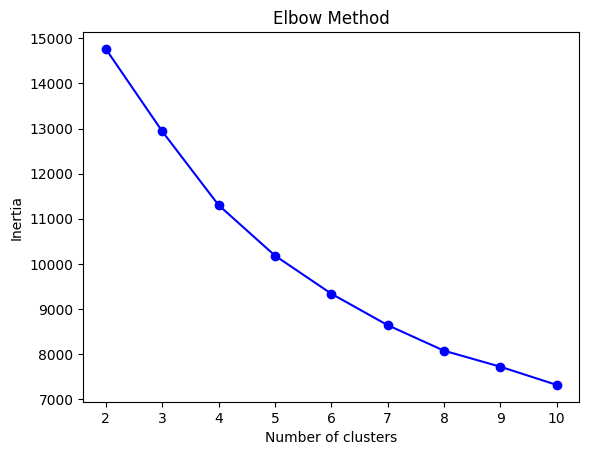

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig("elbow_method.png", dpi=300)
plt.show()

Four clusters were selected because the elbow plot shows a clear inflection point at k=4, where the rate of decrease in inertia begins to level off, indicating a good balance between model fit and simplicity.

In [ ]:
filtered_df = merged_df.dropna(subset=features).reset_index(drop=True)

for col in features:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce")

kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df["Cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = filtered_df.groupby("Cluster")[features].mean().reset_index()
cluster_summary

,Cluster,Ozone,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),Value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,0,0.042831,7.087764,7.472381,34.581328,2.605218e+05,0.209677,0.195355,0.041853,0.088626,0.816798,61690.761411,0.157936,0.658553
1,1,0.046670,10.661703,15.119930,48.781778,7.287889e+05,0.264840,0.133890,0.067710,0.535873,0.307918,58657.066667,0.229582,0.529564
2,2,0.041919,8.485263,15.448696,40.547368,1.246674e+06,0.225831,0.151315,0.051713,0.219054,0.577869,90009.910526,0.103976,0.724364
3,3,0.041571,8.404995,15.368633,61.245963,7.910257e+05,0.216020,0.152591,0.292521,0.148002,0.486473,62663.944099,0.202419,0.662399


Cluster 0
This group has the lowest pollution overall, with PM2.5 at 7.1, NO2 at 7.5, and ozone at 0.043. Asthma is also lowest at 34.6. Median income is ~$61k, child poverty 16%, and the population is 82% White, 9% Hispanic, and 4% Black.

Cluster 1
Pollution is elevated, with PM2.5 at 10.7, NO2 at 15.1, and ozone slightly higher at 0.047. Asthma is 48.8, with the lowest median income (~$59k) and highest child poverty (23%). Demographics show a majority Hispanic population (54%), alongside 31% White and 7% Black.

Cluster 2
These counties report very high NO2 (15.4) but lower ozone (0.042) and moderate PM2.5 (8.5). Asthma is mid-range at 40.5. This cluster is the wealthiest (income ~$90k), with only 10% of children in poverty and 72% with some college. Demographics: 58% White, 22% Hispanic, 5% Black.

Cluster 3
Pollution is mid-range, with PM2.5 at 8.4, NO2 at 15.4, and ozone at 0.042. Despite this, asthma is highest at 61.2. Income is ~$62k, child poverty 20%, and demographics show a large Black population (29%), 49% White, and 15% Hispanic.

The clustering analysis shows that air pollution alone does not fully explain asthma disparities. Demographic and socioeconomic factors strongly interact with environmental exposures. Clusters with higher poverty, lower income, and larger minority populations (especially Black and Hispanic) are associated with higher asthma rates, even when pollution levels are only moderate. Conversely, clusters with higher household income and educational attainment show lower asthma burdens, despite experiencing relatively high NO₂ and PM2.5 levels. Ozone was included in the analysis, but its limited variability across counties meant it contributed less to distinguishing groups. These results suggest that while pollution is an important driver of asthma risk, social and economic disparities amplify health outcomes.

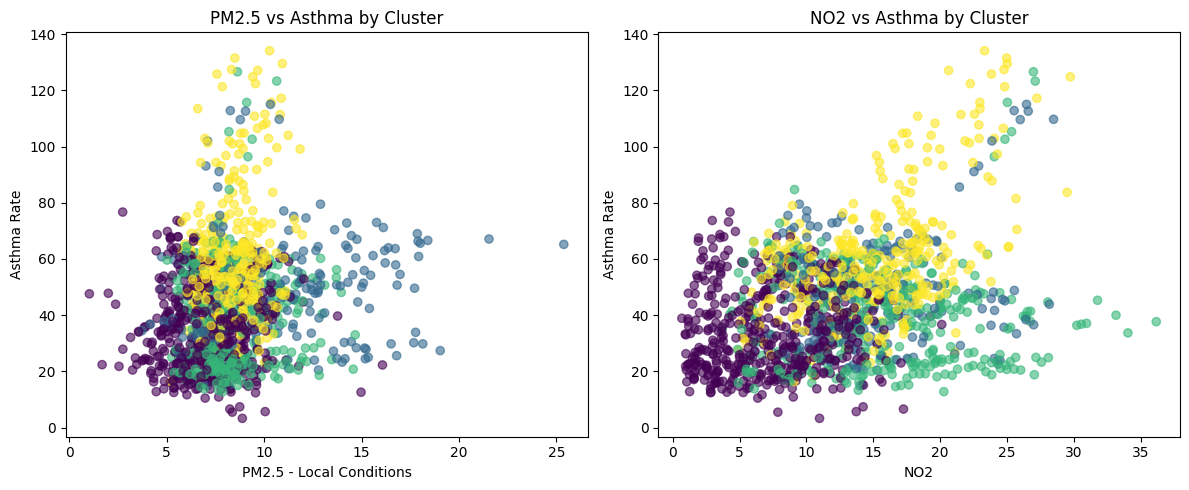

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(filtered_df["PM2.5 - Local Conditions"], filtered_df["Value"],
                c=filtered_df["Cluster"], cmap="viridis", alpha=0.6)
axes[0].set_xlabel("PM2.5 - Local Conditions")
axes[0].set_ylabel("Asthma Rate")
axes[0].set_title("PM2.5 vs Asthma by Cluster")

axes[1].scatter(filtered_df["Nitrogen dioxide (NO2)"], filtered_df["Value"],
                c=filtered_df["Cluster"], cmap="viridis", alpha=0.6)
axes[1].set_xlabel("NO2")
axes[1].set_ylabel("Asthma Rate")
axes[1].set_title("NO2 vs Asthma by Cluster")

plt.tight_layout()
plt.savefig("cluster_scatterplots.png", dpi=300)
plt.show()

These scatterplots show how asthma emergency visit rates vary with pollutant levels, separated by the four clusters. The left figure indicates that asthma rates do not rise consistently with PM2.5, but clusters capture groups of counties with distinct combinations of exposure and outcomes. The right figure shows a clearer upward trend for NO₂, where higher levels are more often associated with higher asthma rates, and clusters highlight how this relationship differs across counties.

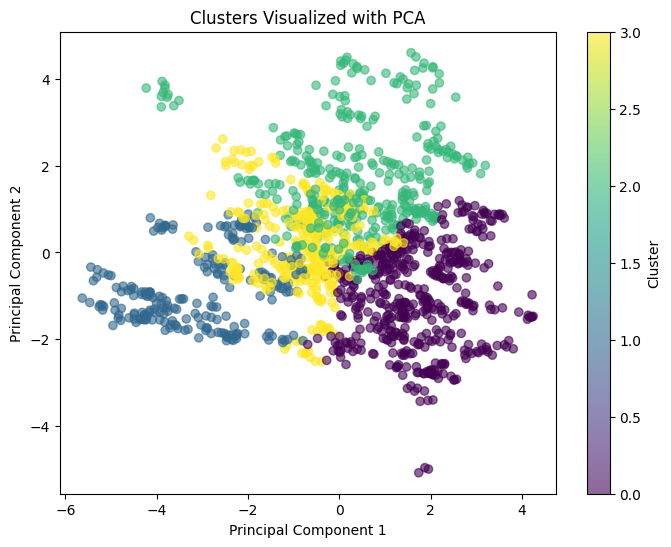

In [ ]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Visualized with PCA")
plt.colorbar(label="Cluster")
plt.savefig("pca_clusters.png", dpi=300)
plt.show()

PCA was used to reduce the full set of asthma, pollution, and demographic variables into two principal components that capture most of the variation in the data. This made it possible to create a two-dimensional plot that represents the combined influence of many factors at once. The scatterplot shows how the four clusters identified through k-means separate in this compressed feature space. While there is some overlap, the clusters form distinct areas that reflect meaningful differences in the underlying data. The visualization confirms that the clusters are not random but instead represent systematic relationships between asthma outcomes, pollutant exposure, and demographic conditions.

In [ ]:
print(merged_df.columns.tolist())

['StateFIPS', 'State', 'CountyFIPS', 'County', 'Year', 'Value', 'FIPS', 'Nitrogen dioxide (NO2)', 'Ozone', 'PM2.5 - Local Conditions', '5-digit FIPS Code', 'Population raw value', '% below 18 years of age raw value', '% 65 and older raw value', '% Non-Hispanic Black raw value', '% Hispanic raw value', '% Non-Hispanic White raw value', 'Median household income raw value', 'Children in poverty raw value', 'Some college raw value']


In [ ]:
# unstandardized regression

import statsmodels.api as sm

features = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value",
    "Year"
]

df_reg = merged_df.dropna(subset=["Value"] + features).copy()

# force everything to numeric
for col in features + ["Value"]:
    df_reg[col] = pd.to_numeric(df_reg[col], errors="coerce")

X = df_reg[features]
y = df_reg["Value"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          6.78e-190
Time:                        20:04:49   Log-Likelihood:                -5798.7
No. Observations:                1409   AIC:                         1.163e+04
Df Residuals:                    1395   BIC:                         1.170e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

The regression model (unstandarized values) explained about 48% of the variation in asthma ER visit rates (R² = 0.484, adjusted R² = 0.480), which means nearly half of the differences across counties and years can be accounted for by the pollutants and demographics included. Among pollutants, nitrogen dioxide (NO₂) was significant with a coefficient of 0.37 (p < 0.001), indicating higher NO₂ was linked to higher asthma rates, while PM2.5 showed a small but nonsignificant positive effect and ozone had no impact. Demographics played a clear role as counties with larger populations had slightly lower asthma rates (-1.85e-06, p < 0.001), while more residents aged 65+ were linked to higher rates (46.9, p = 0.007). Higher percentages of Black residents were associated with increased asthma (36.3, p < 0.001), while higher percentages of White residents were linked with decreased rates (-32.4, p < 0.001). Poverty also mattered, with more children in poverty predicting higher asthma (1.22, p = 0.009). Year had a negative coefficient (-2.90, p < 0.001), showing asthma ER visits declined over time even after accounting for pollution and demographics. Overall, the model suggests asthma disparities are driven both by pollution exposure and demographic inequalities, with notable declines over the 2011–2021 period. The model will be rerun after standardizinf values so coefficients are more easily comaprable.

In [ ]:
# regression with standardized inputs (pop excluded)

from sklearn.preprocessing import StandardScaler

features = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value",
    "Year"
]

df_reg = merged_df.dropna(subset=["Value"] + features).copy()

for col in features + ["Value"]:
    df_reg[col] = pd.to_numeric(df_reg[col], errors="coerce")

X = df_reg[features]
y = df_reg["Value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          5.49e-187
Time:                        20:04:49   Log-Likelihood:                -5807.9
No. Observations:                1409   AIC:                         1.164e+04
Df Residuals:                    1396   BIC:                         1.171e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

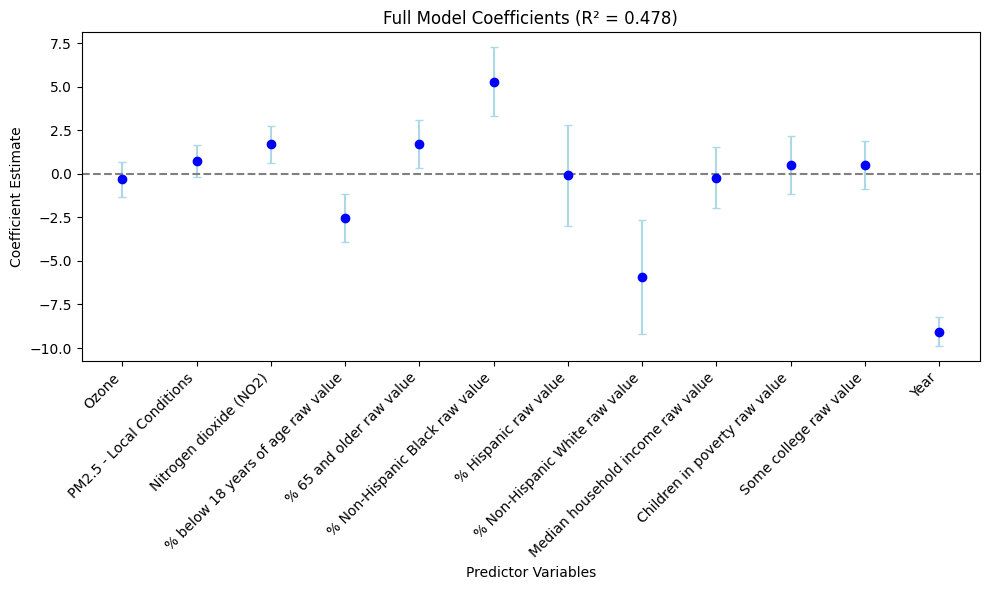

In [ ]:
coef_full = model.params.drop(labels=["Intercept", "const", "Population raw value"], errors="ignore")
conf_full = model.conf_int().loc[coef_full.index]
conf_full.columns = ["2.5%", "97.5%"]

plt.figure(figsize=(10,6))
plt.errorbar(coef_full.index, coef_full,
             yerr=[coef_full - conf_full["2.5%"], conf_full["97.5%"] - coef_full],
             fmt='o', color='blue', ecolor='lightblue', capsize=3)

plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coefficient Estimate")
plt.xlabel("Predictor Variables")
plt.title("Full Model Coefficients (R² = {:.3f})".format(model.rsquared))
plt.tight_layout()
plt.savefig("full_model_coefficients.png", dpi=300)
plt.show()

In [ ]:

# reduced features (unstandardized)
important_features = [
    "Nitrogen dioxide (NO2)",
    "Population raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Non-Hispanic White raw value",
    "Children in poverty raw value",
    "Year"
]

df_reg2 = merged_df.dropna(subset=["Value"] + important_features).copy()

for col in important_features + ["Value"]:
    df_reg2[col] = pd.to_numeric(df_reg2[col], errors="coerce")

X = df_reg2[important_features]
y = df_reg2["Value"]

X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          1.17e-208
Time:                        20:04:52   Log-Likelihood:                -6599.9
No. Observations:                1604   AIC:                         1.322e+04
Df Residuals:                    1596   BIC:                         1.326e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

The regression with the reduced set of predictors produced an R² of 0.460, meaning about 46% of the variation in asthma emergency visit rates is explained by the included pollutants, demographics, and year. Several variables stand out. Nitrogen dioxide (NO₂) is positively associated with asthma rates (coef = 0.33, p < 0.001), suggesting higher NO₂ levels predict more asthma visits. Population size is significant but negative (coef = -1.16e-06, p = 0.005), possibly reflecting that rates are already population-standardized. Age 65 and older is strongly positive (coef = 75.19, p < 0.001), indicating that counties with more older residents have higher asthma visit rates. % Non-Hispanic Black is also strongly positive (coef = 45.52, p < 0.001), highlighting racial disparities. Conversely, % Non-Hispanic White is significantly negative (coef = -26.87, p < 0.001), implying lower asthma visit rates in counties with larger White populations. The year variable is negative (coef = -2.92, p < 0.001), showing an overall downward trend in asthma rates across 2011–2021. Other predictors like children in poverty were not statistically significant. Overall, the model shows that pollutant exposure (especially NO₂), demographics(the age and racial/ethnic makeup of counties), and time all play important roles in explaining asthma burdens at the county level. This regression does not significantly add to the results.